In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('DoctorVisits-DA.csv')
 

In [48]:
# 1. Number of Duplicates found in the Dataset
num_duplicates = df.duplicated().sum()
print(f'Number of duplicates: {num_duplicates}')

Number of duplicates: 0


In [49]:
# 2. Total number of People based on their count of illness
illness_count = df['illness'].value_counts()
print('Total number of people based on their count of illness:')
print(illness_count)

Total number of people based on their count of illness:
illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64


In [50]:
# 3. Gender wise illness
gender_illness = df.groupby('gender')['illness'].sum()
print('Gender wise illness:')
print(gender_illness)

Gender wise illness:
gender
female    4353
male      3079
Name: illness, dtype: int64


In [51]:
# 4. Analyse Maximum, Minimum and Median income People
max_income = df['income'].max()
min_income = df['income'].min()
median_income = df['income'].median()
print(f'Maximum income: {max_income}')
print(f'Minimum income: {min_income}')
print(f'Median income: {median_income}')

Maximum income: 1.5
Minimum income: 0.0
Median income: 0.55


In [52]:
# 5. Number of days of reduced activity of Male and Female separately due to illness
reduced_activity = df.groupby('gender')['reduced'].sum()
print('Number of days of reduced activity due to illness:')
print(reduced_activity)

Number of days of reduced activity due to illness:
gender
female    2636
male      1837
Name: reduced, dtype: int64


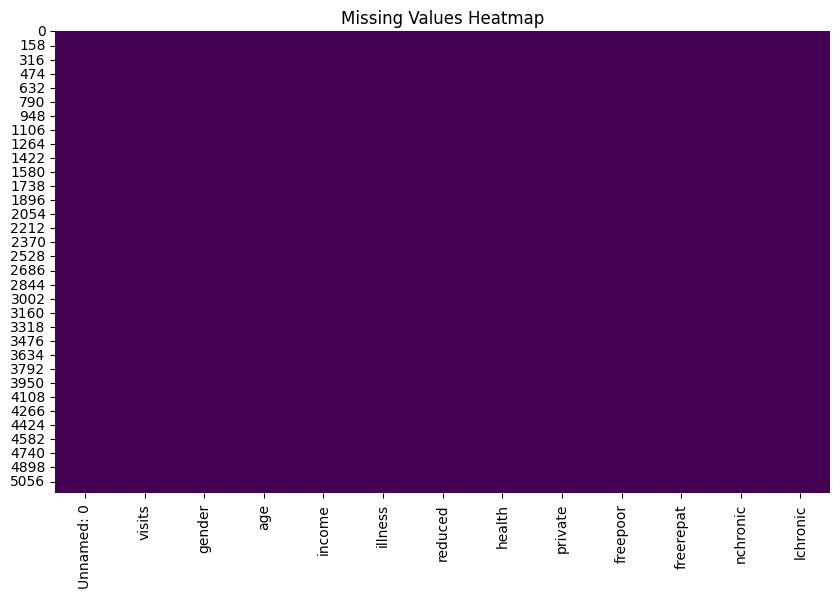

In [53]:
# 6. Visualize missing values using Heat map chart
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

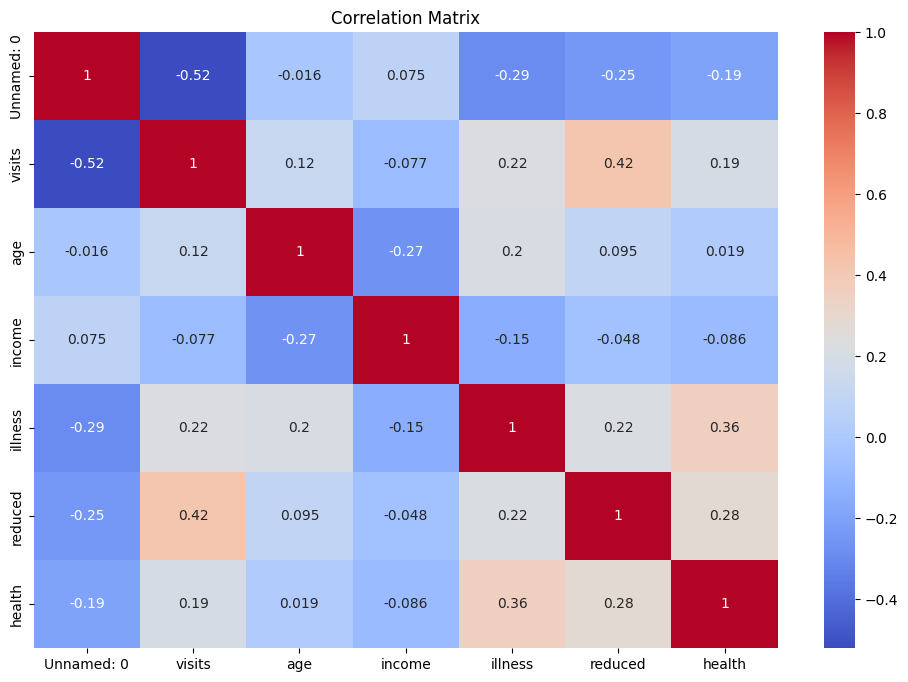

In [54]:
# 7. Correlation between variables
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

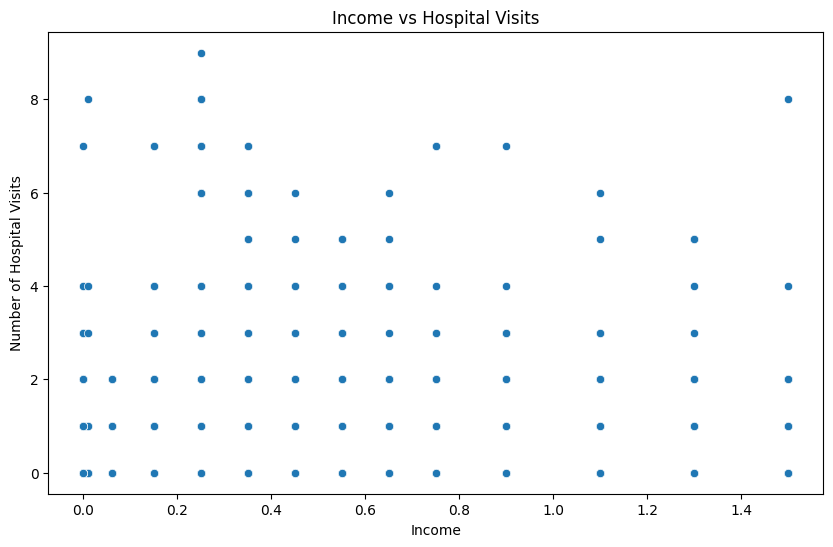

In [55]:
# 8. Analyse how income affects the number of visits to the Hospital
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='visits', data=df)
plt.title('Income vs Hospital Visits')
plt.xlabel('Income')
plt.ylabel('Number of Hospital Visits')
plt.show()

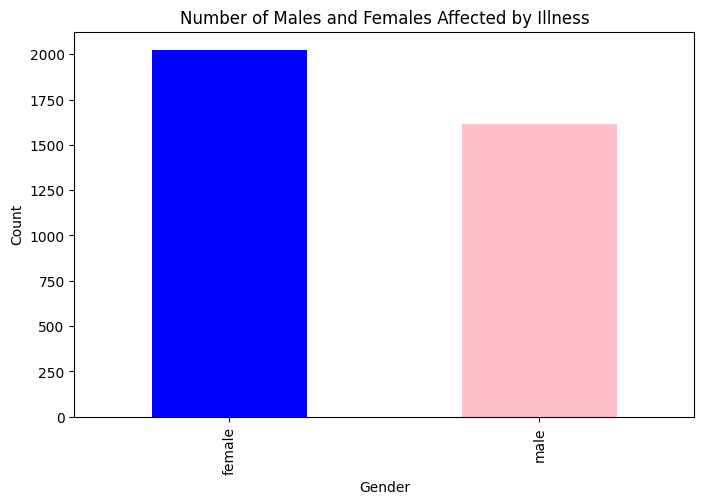

In [56]:
# 9. Count and Visualize the number of Males and Females affected by illness
gender_illness_count = df[df['illness'] > 0]['gender'].value_counts()
plt.figure(figsize=(8, 5))
gender_illness_count.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Males and Females Affected by Illness')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [57]:
df.head(3)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no


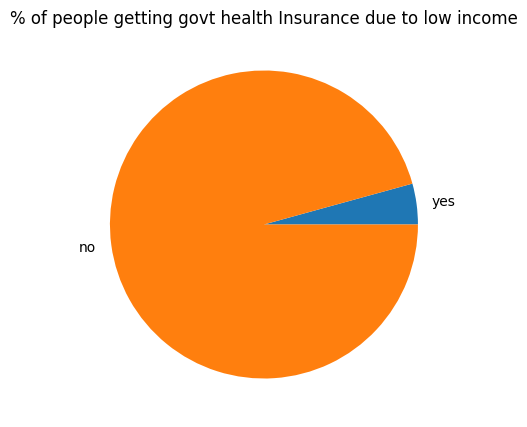

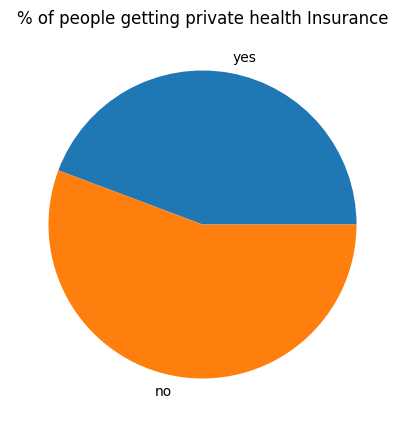

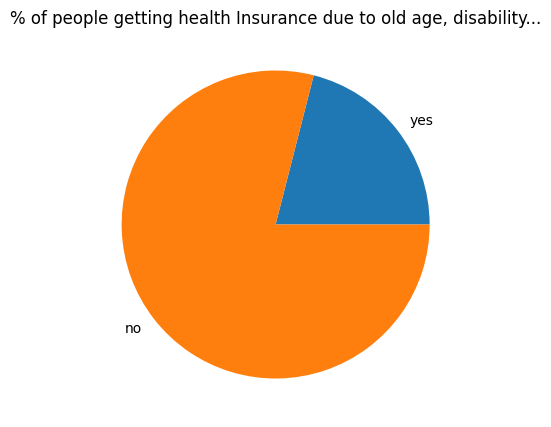

In [58]:
# 10. Visualize the Percentage of People getting Govt. health insurance due to low income, due to old age
label=['yes','no']
Y=df[df['freepoor']=='yes']
N=df[df['freepoor']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to low income")
plt.show()

Y=df[df['private']=='yes']
N=df[df['private']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting private health Insurance")
plt.show()

Y=df[df['freerepat']=='yes']
N=df[df['freerepat']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting health Insurance due to old age, disability...")
plt.show()


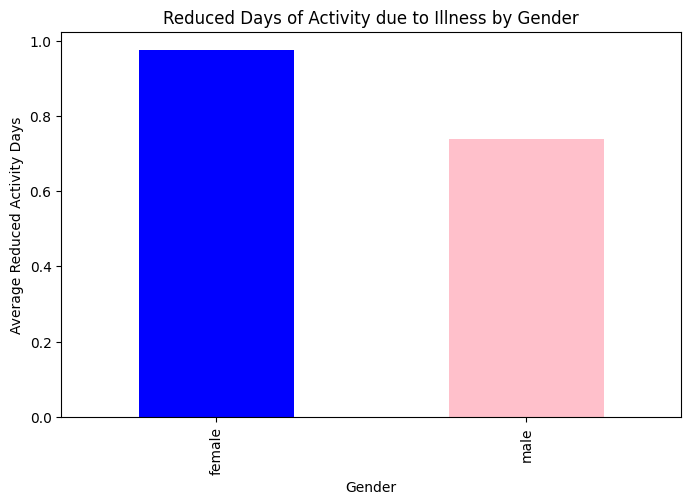

In [59]:
# 11. Plot bar chart to analyse the reduced days of activity due to illness based on Gender
plt.figure(figsize=(8, 5))
df.groupby('gender')['reduced'].mean().plot(kind='bar', color=['blue', 'pink'])
plt.title('Reduced Days of Activity due to Illness by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Reduced Activity Days')
plt.show()

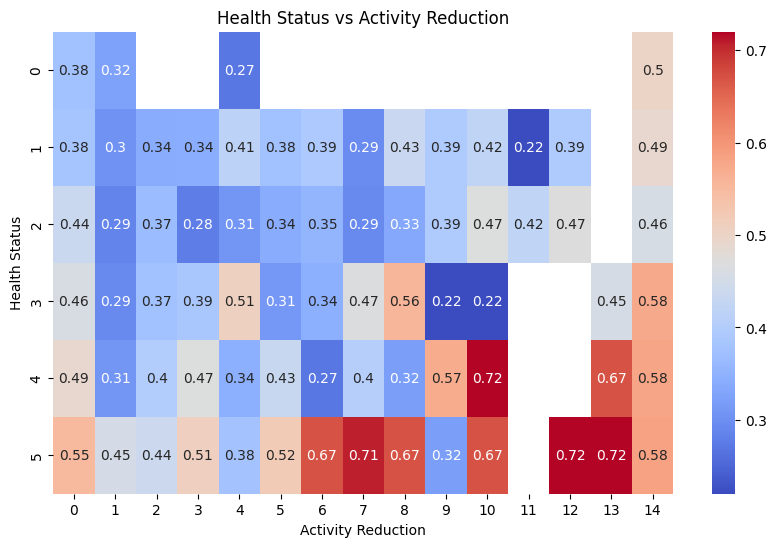

In [60]:
# 12. Relation between Health status and Activity reduction using heat map chart
health_activity_corr = df.pivot_table(index='illness', columns='reduced', values='age', aggfunc='mean')
# Plot the heat map
plt.figure(figsize=(10, 6))
sns.heatmap(health_activity_corr, annot=True, cmap='coolwarm')
plt.title('Health Status vs Activity Reduction')
plt.xlabel('Activity Reduction')
plt.ylabel('Health Status')
plt.show()

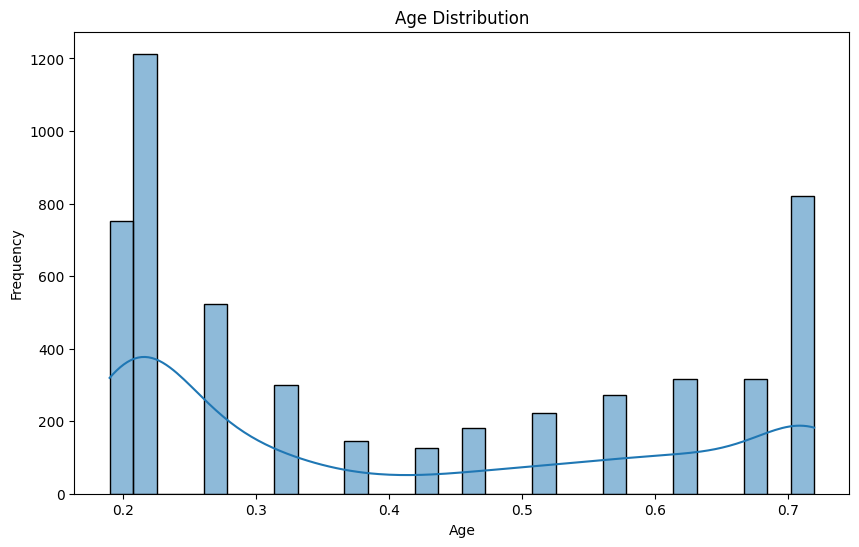

In [61]:
# 13. Additional Analysis: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Distribution of Doctor Visits by Gender and Age

C:\Users\manik\AppData\Local\Temp\ipykernel_19124\1769900451.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='age_group', y='visits', hue='gender', ci=None)


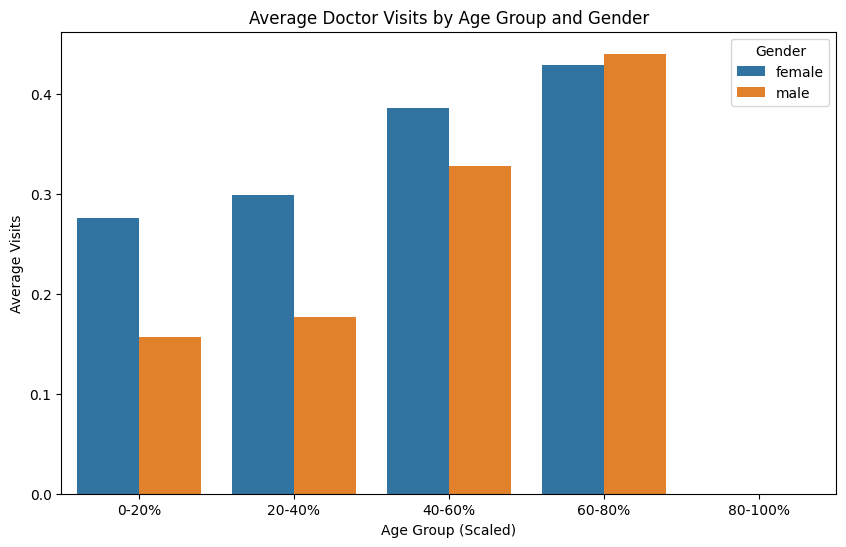

In [65]:

#14 : Convert age into age groups for better visualization
df['age_group'] = pd.cut(df['age'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='age_group', y='visits', hue='gender', ci=None)
plt.title("Average Doctor Visits by Age Group and Gender")
plt.xlabel("Age Group (Scaled)")
plt.ylabel("Average Visits")
plt.legend(title="Gender")
plt.show()


## Income Distribution by Health Status

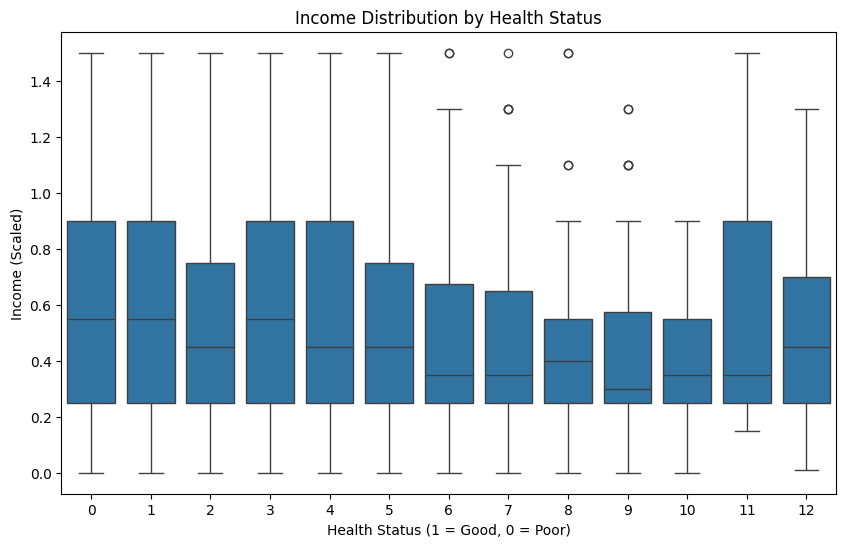

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='health', y='income')
plt.title("Income Distribution by Health Status")
plt.xlabel("Health Status (1 = Good, 0 = Poor)")
plt.ylabel("Income (Scaled)")
plt.show()


## Relationship between Illness Count and Reduced Activity Days

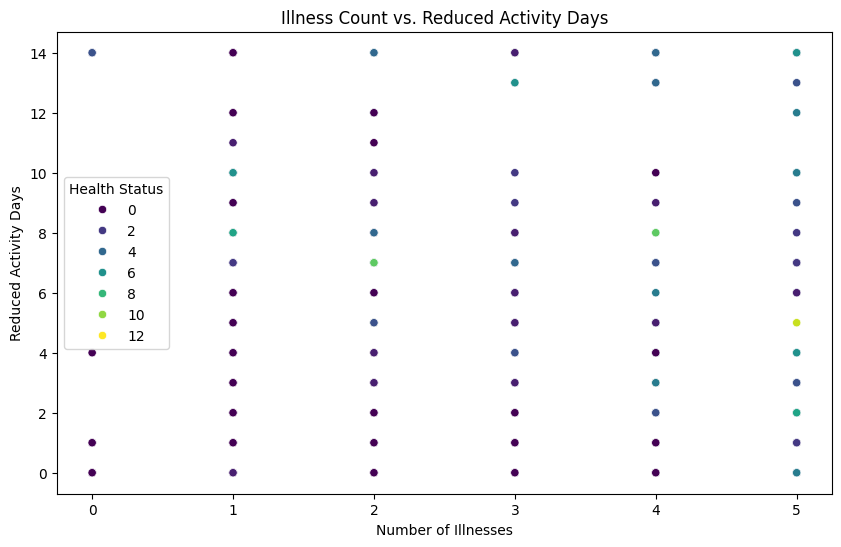

In [67]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='illness', y='reduced', hue='health', palette='viridis')
plt.title("Illness Count vs. Reduced Activity Days")
plt.xlabel("Number of Illnesses")
plt.ylabel("Reduced Activity Days")
plt.legend(title="Health Status")
plt.show()

## Doctor Visits by Private Insurance Status

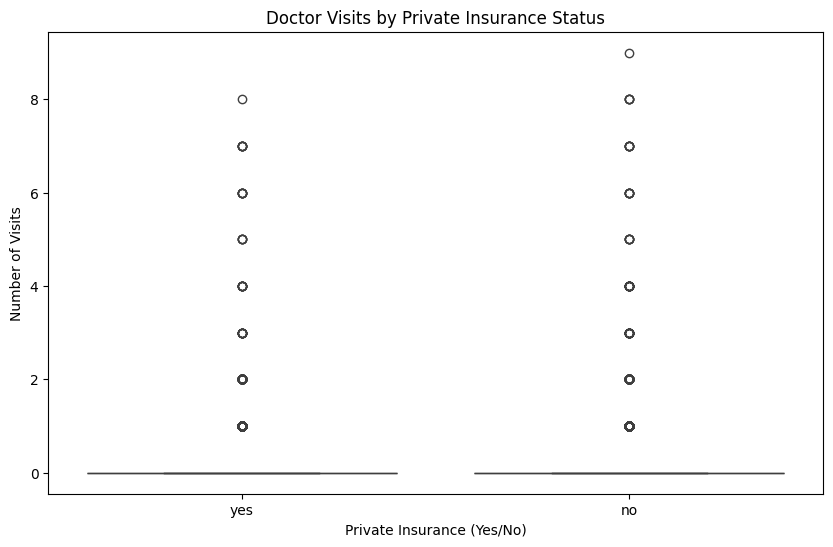

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='private', y='visits')
plt.title("Doctor Visits by Private Insurance Status")
plt.xlabel("Private Insurance (Yes/No)")
plt.ylabel("Number of Visits")
plt.show()

## Impact of Chronic Conditions on Health and Doctor Visits

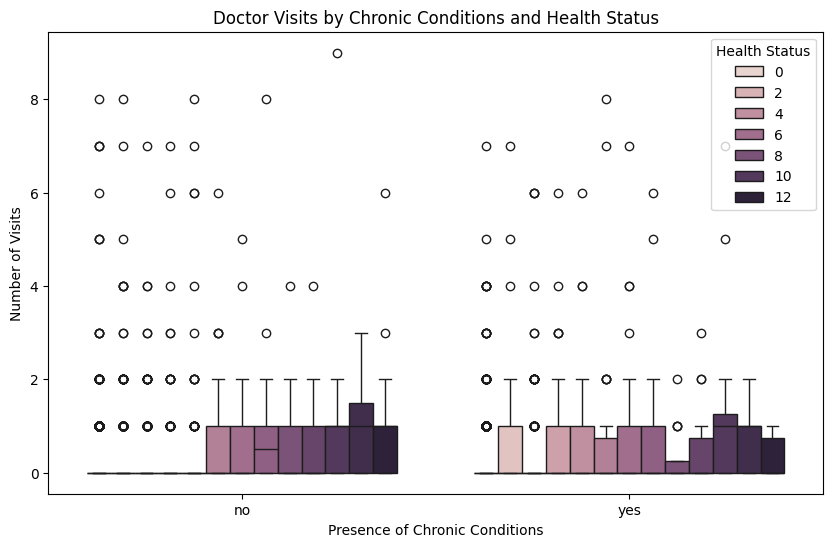

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='nchronic', y='visits', hue='health')
plt.title("Doctor Visits by Chronic Conditions and Health Status")
plt.xlabel("Presence of Chronic Conditions")
plt.ylabel("Number of Visits")
plt.legend(title="Health Status")
plt.show()